In [19]:
import pandas as pd

In [20]:
df_o_products = pd.read_csv('/datasets/order_products.csv',sep=';')
df_o_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [23]:
df_orders = pd.read_csv('/datasets/instacart_orders.csv',sep=';')
display(df_orders)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [32]:
df_products = pd.read_csv('/datasets/products.csv',sep=';')
display(df_products)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [25]:

# Check for duplicated orders
dupe_orders = df_orders[df_orders.duplicated()]
print(dupe_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

In [26]:
# Check for all orders placed Wednesday at 2:00 AM
'''
when looking at the table, it seems as though the time is formatted in military time. 
When looking at the 'order_dow' it seems as though they're numbered from 0-6. 
7 Indices for 7 days of the week starting with Sunday as 0 

'''
wed_2 = df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)]
display(wed_2)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [27]:
# Remove duplicate orders
df_orders = df_orders.drop_duplicates()


In [28]:
# Double check for duplicate rows
dupe_orders = df_orders[df_orders.duplicated()]
print(dupe_orders)

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [29]:
# Double check for duplicate order IDs only
dupe_ids = df_orders[df_orders['order_id'].duplicated()]
print(dupe_ids)

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


### `products` data frame

In [33]:
# Check for fully duplicate rows
duped_products = df_products.duplicated()
print(duped_products)

0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Length: 49694, dtype: bool


In [34]:
# Check for just duplicate product IDs
duped_product_ids = df_products['product_id'].duplicated()
print(duped_product_ids)

0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Name: product_id, Length: 49694, dtype: bool


In [35]:
# Check for just duplicate product names (convert names to lowercase to compare better)
#Changing column names to lowercase
df_products['product_name'].str.lower()
#checking for duplicate product names 
dupe_prod_names = df_products['product_name'].duplicated()
print(dupe_prod_names)

0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Name: product_name, Length: 49694, dtype: bool


In [36]:
# Check for duplicate product names that aren't missing
duped_prod_names = df_products['product_name'].notna() & df_products.duplicated(subset='product_name')
print(duped_prod_names)

0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Length: 49694, dtype: bool


### `departments` data frame

In [37]:
df_dept = pd.read_csv('/datasets/departments.csv',sep=';')
df_dept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [38]:
display(df_dept)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


### `aisles` data frame

In [39]:
df_aisles = pd.read_csv('/datasets/aisles.csv',sep=';')
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [40]:
display(df_aisles)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


### `order_products` data frame

In [41]:
# Check for fullly duplicate rows
dupe_oproducts = df_o_products.duplicated()
print(dupe_oproducts)

0          False
1          False
2          False
3          False
4          False
           ...  
4545002    False
4545003    False
4545004    False
4545005    False
4545006    False
Length: 4545007, dtype: bool


In [42]:
# Double check for any other tricky duplicates

#^^This isn't particularly clear so I simply repeated the acctuions from one of the previous tasks, looking for the nonmissing ones
duped_oproducts = df_o_products.notna()
duped_oproducts = duped_oproducts.duplicated()
print(duped_oproducts)

0          False
1           True
2           True
3           True
4           True
           ...  
4545002     True
4545003     True
4545004     True
4545005     True
4545006     True
Length: 4545007, dtype: bool


## Find and remove missing values


### `products` data frame

In [43]:
df_products = pd.read_csv('/datasets/products.csv',sep=';')
display(df_products)
df_products.info()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [44]:
# Are all of the missing product names associated with aisle ID 100?
import numpy as np

#finding the missing values in the 'product name column'
missing_names = df_products[df_products['product_name'].isnull()]
#finding whether or not all the missing values in product name are related to aisle 100 and returning a bool
aisle_missing = np.all(missing_names['aisle_id'] == 100)
#print(missing_names)
print(aisle_missing)


True


In [45]:
# Are all of the missing product names associated with department ID 21?
#finding whether or not all the missing values in product name are related to aisle 100 and returning a bool
dept_missing = np.all(missing_names['department_id'] == 21)
print(dept_missing)

True


In [ ]:
# What is this ailse and department?
'''This question feels unclear in what it's asking for me to do.
The previous two questions already specify that the aisle is 100 and the department id is 21
Am I being asked to print that set out as a table or use it in some other way? 
'''

In [46]:
# Fill missing product names with 'Unknown'
missing_names = missing_names.fillna('Unknown')
display(missing_names)

,product_id,product_name,aisle_id,department_id
37,38,Unknown,100,21
71,72,Unknown,100,21
109,110,Unknown,100,21
296,297,Unknown,100,21
416,417,Unknown,100,21
...,...,...,...,...
49552,49553,Unknown,100,21
49574,49575,Unknown,100,21
49640,49641,Unknown,100,21
49663,49664,Unknown,100,21


### `orders` data frame

In [62]:
df_orders = pd.read_csv('/datasets/instacart_orders.csv',sep=';')
display(df_orders)
df_orders.info()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [ ]:
# Are there any missing values where it's not a customer's first order?
'''
sorting the data by the order number column to discern where the order count begins.
Didn't want to assume that it begain with 0 without checking.
'''
sorted_orders = df_orders.sort_values('order_number')
display(sorted_orders)

'''
After discovering that 1 is the lowest value in the column, I can deduce that the count starts at one.
I can also deduce that userids with only 1 order AND a missing value in 'days_since_prior_order' for their row
fall into the customer's that have made their first order.

Now I have parameters with which to work an answer the question
'''

#this variable is currently unused
first_orders = df_orders[(df_orders['order_number'] == 1) & (df_orders['days_since_prior_order'] == 'NaN')]

#Check for the answer to the question and print it as a bool
non_first = np.all(df_orders[(df_orders['order_number'] > 1)].isnull())
print(non_first)

### `order_products` data frame

In [63]:
df_order_products = pd.read_csv('/datasets/order_products.csv',sep=';')
display(df_order_products)
df_order_products.info()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [ ]:
# What are the min and max values in this column?
'''
Unsure which column(s) are being referred to in this question
'''
min_values = df_order_products.min()
max_values = df_order_products.max()
print(min_values)

print(max_values)


In [ ]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_addtocart = df_order_products['add_to_cart_order'].isnull()
ids_with_missing = df_order_products.loc[missing_addtocart,'order_id']
print(ids_with_missing)

In [ ]:
# Do all orders with missing values have more than 64 products?
more_than_64 = np.all(df_order_products['add_to_cart_order'] > 64)
print(more_than_64)

In [ ]:
# Replace missing values with 999 and convert column to integer type
df_order_products = df_order_products.fillna(999).astype(int)


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [ ]:

#Checking the value ranges by using min/max
min_hour = df_orders['order_hour_of_day'].min()
max_hour = df_orders['order_hour_of_day'].max()
print(f"The range of values goes from {min_hour} to {max_hour}")

In [ ]:

#Checking the value ranges by using min/max
min_day = df_orders['order_dow'].min()
max_day = df_orders['order_dow'].max()
print(f"The range of values goes from {min_day} to {max_day}")

### [A2] What time of day do people shop for groceries?

In [ ]:
#I'll determine this by using getting the value counts from order hour of the day and printing which id shows up the most often
shopping_hour = df_orders['order_hour_of_day'].value_counts().idxmax()
print(shopping_hour)

### [A3] What day of the week do people shop for groceries?

In [ ]:
#I'll determine this by using getting the average from the hour_of_day column
shopping_day = df_orders['order_dow'].value_counts().idxmax()
print(shopping_day)

### [A4] How long do people wait until placing another order?

In [ ]:
display(df_orders)
df_orders.info()

In [ ]:
next_order = df_orders['days_since_prior_order'].value_counts().idxmax()
print(next_order)

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#based on the previously discovered relation between the indicies and the days of the week 
weds = 3
#filter the dataframe based on things happening only on Weds
weds_shopping = df_orders[df_orders['order_dow'] == weds]

#plotting the histogram
plt.hist(weds_shopping['order_hour_of_day'], bins=24, edgecolor='black')
plt.title('Wednesday Dsitribution'.format(weds))
plt.xlabel('testing')
plt.show()

In [ ]:
#based on the previously discovered relation between the indicies and the days of the week 
sat = 6
#filter the dataframe based on things happening only on Weds
sat_shopping = df_orders[df_orders['order_dow'] == sat]

#plotting the histogram
plt.hist(sat_shopping['order_hour_of_day'], bins=24, edgecolor='black')
plt.title('Saturday Dsitribution'.format(sat))
plt.show()

In [ ]:
weds_shopping['order_hour_of_day'].plot(kind='hist',bins=24)
sat_shopping['order_hour_of_day'].plot(kind='hist',bins=24,alpha=0.5)
plt.legend(["Wednesday","Saturday"])
plt.show()

### [B2] What's the distribution for the number of orders per customer?

In [ ]:
orders_per_user = df_orders.groupby('user_id')['order_id'].count()

In [ ]:
plt.hist(orders_per_user, bins=24, edgecolor='black')
plt.title('Distribution of Number of Orders per Customer')

plt.show()

### [B3] What are the top 20 popular products (display their id and name)?

In [ ]:
df_o_products = pd.read_csv('/datasets/order_products.csv',sep=';')
display(df_o_products)

df_products = pd.read_csv('/datasets/products.csv',sep=';')
display(df_products)


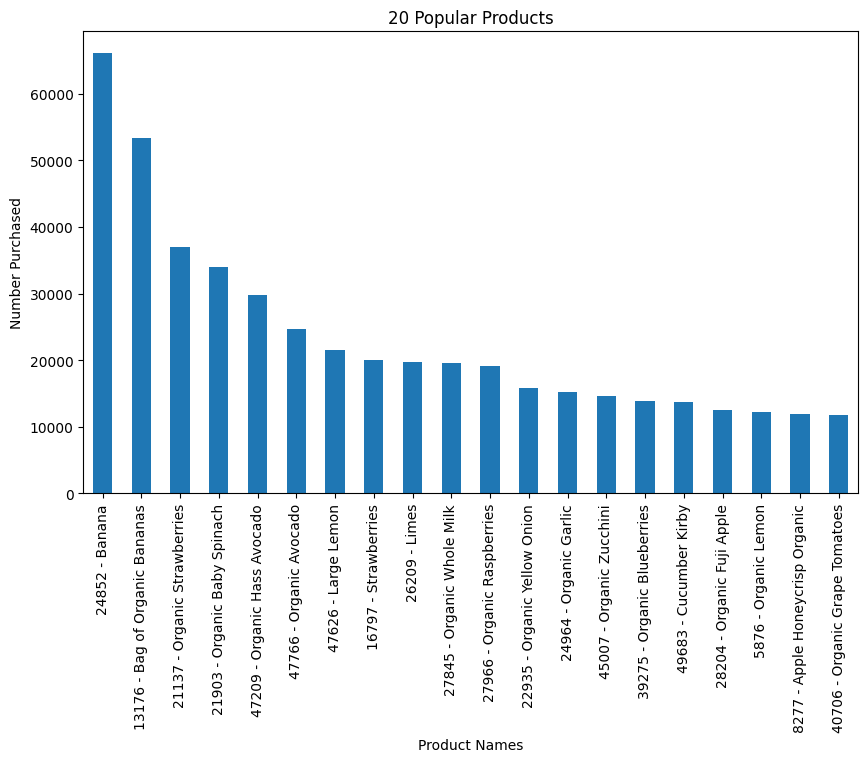

In [53]:
#Merge the two dataframes on product id column
order_data = pd.merge(df_products,df_o_products, on='product_id')


order_data['id_and_name'] = order_data['product_id'].astype(str) + ' - ' + order_data['product_name']
counts = order_data['id_and_name'].value_counts()
top_20 = counts[:20]
plt.figure(figsize=(10, 6))
top_20.plot(kind='bar')
plt.title('20 Popular Products')
plt.xlabel('Product Names')
plt.ylabel('Number Purchased')
plt.show()

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [47]:
#Group by order id and find the max add_to_card_order per group
items_per_order = df_o_products.groupby('order_id')['add_to_cart_order'].max()

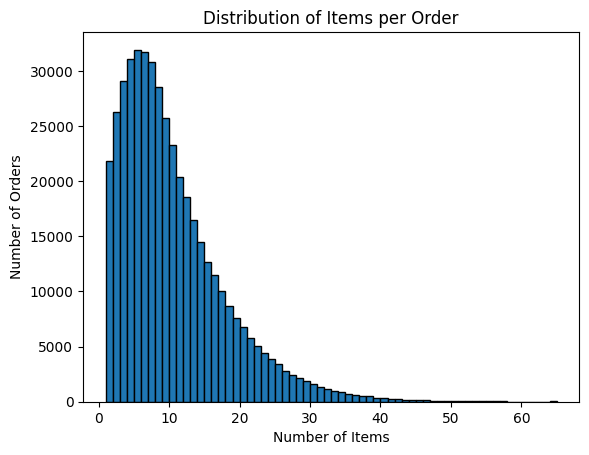

In [49]:
#plot the data
plt.hist(items_per_order, bins=range(1, int(items_per_order.max()) + 2),edgecolor='black')
plt.title('Distribution of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.show()

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [54]:
#created this merged table earlier
display(order_data)

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,id_and_name
0,1,Chocolate Sandwich Cookies,61,19,1104373,11.0,1,1 - Chocolate Sandwich Cookies
1,1,Chocolate Sandwich Cookies,61,19,1774977,4.0,1,1 - Chocolate Sandwich Cookies
2,1,Chocolate Sandwich Cookies,61,19,652770,10.0,0,1 - Chocolate Sandwich Cookies
3,1,Chocolate Sandwich Cookies,61,19,1000035,6.0,1,1 - Chocolate Sandwich Cookies
4,1,Chocolate Sandwich Cookies,61,19,1679949,9.0,0,1 - Chocolate Sandwich Cookies
...,...,...,...,...,...,...,...,...
4545002,49694,BURRITO- STEAK & CHEESE,38,1,3034802,10.0,0,49694 - BURRITO- STEAK & CHEESE
4545003,49694,BURRITO- STEAK & CHEESE,38,1,3175081,3.0,0,49694 - BURRITO- STEAK & CHEESE
4545004,49694,BURRITO- STEAK & CHEESE,38,1,694132,2.0,0,49694 - BURRITO- STEAK & CHEESE
4545005,49694,BURRITO- STEAK & CHEESE,38,1,2843165,5.0,0,49694 - BURRITO- STEAK & CHEESE


24852 - Banana                     55763
13176 - Bag of Organic Bananas     44450
21137 - Organic Strawberries       28639
21903 - Organic Baby Spinach       26233
47209 - Organic Hass Avocado       23629
47766 - Organic Avocado            18743
27845 - Organic Whole Milk         16251
47626 - Large Lemon                15044
27966 - Organic Raspberries        14748
16797 - Strawberries               13945
26209 - Limes                      13327
22935 - Organic Yellow Onion       11145
24964 - Organic Garlic             10411
45007 - Organic Zucchini           10076
49683 - Cucumber Kirby              9538
28204 - Organic Fuji Apple          8989
8277 - Apple Honeycrisp Organic     8836
39275 - Organic Blueberries         8799
5876 - Organic Lemon                8412
49235 - Organic Half & Half         8389
Name: id_and_name, dtype: int64

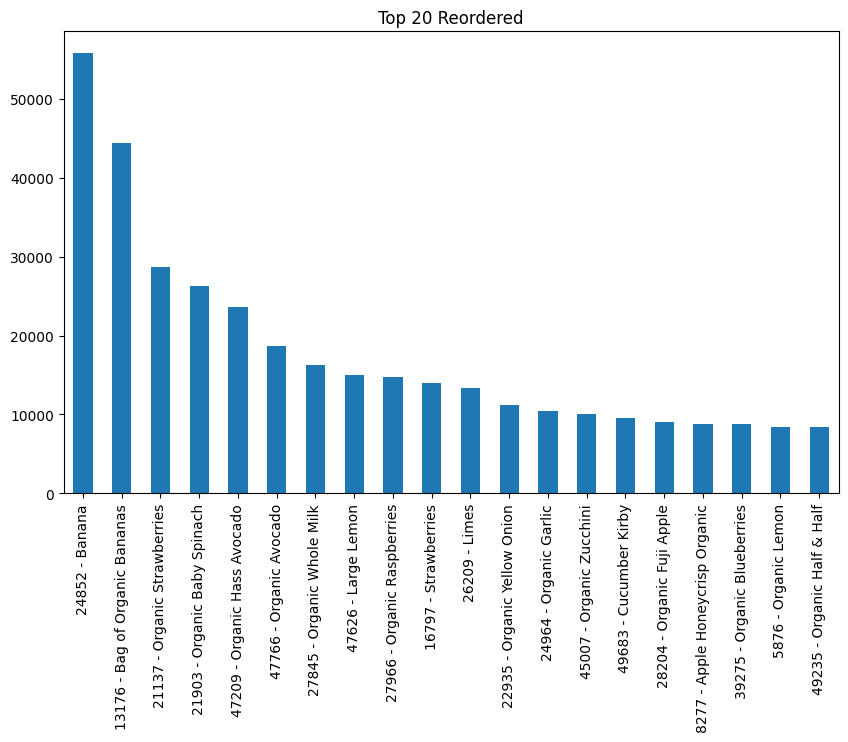

In [57]:
#Filter out rows where reordered is 1
reordered = order_data[order_data['reordered'] == 1]

#counting number of time each product is reordered
reordered_count = reordered['id_and_name'].value_counts()

#Find the top 20
top_20 = reordered_count[:20]
plt.figure(figsize=(10,6))
top_20.plot(kind='bar')
plt.title('Top 20 Reordered')
display(top_20)

### [C3] For each product, what proportion of its orders are reorders?

In [59]:
display(order_data)

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,id_and_name
0,1,Chocolate Sandwich Cookies,61,19,1104373,11.0,1,1 - Chocolate Sandwich Cookies
1,1,Chocolate Sandwich Cookies,61,19,1774977,4.0,1,1 - Chocolate Sandwich Cookies
2,1,Chocolate Sandwich Cookies,61,19,652770,10.0,0,1 - Chocolate Sandwich Cookies
3,1,Chocolate Sandwich Cookies,61,19,1000035,6.0,1,1 - Chocolate Sandwich Cookies
4,1,Chocolate Sandwich Cookies,61,19,1679949,9.0,0,1 - Chocolate Sandwich Cookies
...,...,...,...,...,...,...,...,...
4545002,49694,BURRITO- STEAK & CHEESE,38,1,3034802,10.0,0,49694 - BURRITO- STEAK & CHEESE
4545003,49694,BURRITO- STEAK & CHEESE,38,1,3175081,3.0,0,49694 - BURRITO- STEAK & CHEESE
4545004,49694,BURRITO- STEAK & CHEESE,38,1,694132,2.0,0,49694 - BURRITO- STEAK & CHEESE
4545005,49694,BURRITO- STEAK & CHEESE,38,1,2843165,5.0,0,49694 - BURRITO- STEAK & CHEESE


In [60]:
#grouping data by product id
grouped = order_data.groupby('product_id')['reordered'].agg(['sum', 'count'])

In [61]:
#calculating the portion of reorders per product
grouped['reorder_proportion'] = grouped['sum'] / grouped['count']
display(grouped['reorder_proportion'])

product_id
1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: reorder_proportion, Length: 45573, dtype: float64

### [C4] For each customer, what proportion of their products ordered are reorders?

In [66]:
#These are the two dataframes I'll be using to answer this

display(df_orders)
display(order_data)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,id_and_name
0,1,Chocolate Sandwich Cookies,61,19,1104373,11.0,1,1 - Chocolate Sandwich Cookies
1,1,Chocolate Sandwich Cookies,61,19,1774977,4.0,1,1 - Chocolate Sandwich Cookies
2,1,Chocolate Sandwich Cookies,61,19,652770,10.0,0,1 - Chocolate Sandwich Cookies
3,1,Chocolate Sandwich Cookies,61,19,1000035,6.0,1,1 - Chocolate Sandwich Cookies
4,1,Chocolate Sandwich Cookies,61,19,1679949,9.0,0,1 - Chocolate Sandwich Cookies
...,...,...,...,...,...,...,...,...
4545002,49694,BURRITO- STEAK & CHEESE,38,1,3034802,10.0,0,49694 - BURRITO- STEAK & CHEESE
4545003,49694,BURRITO- STEAK & CHEESE,38,1,3175081,3.0,0,49694 - BURRITO- STEAK & CHEESE
4545004,49694,BURRITO- STEAK & CHEESE,38,1,694132,2.0,0,49694 - BURRITO- STEAK & CHEESE
4545005,49694,BURRITO- STEAK & CHEESE,38,1,2843165,5.0,0,49694 - BURRITO- STEAK & CHEESE


In [69]:
#First merging the two dataframes
merged_odata = pd.merge(df_orders, order_data, on='order_id')
#Then group the merged dataframe by user_id and calculate the sum + count of reordered
group = merged_odata.groupby('user_id')['reordered'].agg(['sum', 'count'])

#calculating the portion of reorders per customer
group['reorder_proportion'] = group['sum']/group['count']
display(group['reorder_proportion'])

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reorder_proportion, Length: 149626, dtype: float64

### [C5] What are the top 20 items that people put in their carts first? 

In [71]:
#dataframe I'll be using
display(order_data)

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,id_and_name
0,1,Chocolate Sandwich Cookies,61,19,1104373,11.0,1,1 - Chocolate Sandwich Cookies
1,1,Chocolate Sandwich Cookies,61,19,1774977,4.0,1,1 - Chocolate Sandwich Cookies
2,1,Chocolate Sandwich Cookies,61,19,652770,10.0,0,1 - Chocolate Sandwich Cookies
3,1,Chocolate Sandwich Cookies,61,19,1000035,6.0,1,1 - Chocolate Sandwich Cookies
4,1,Chocolate Sandwich Cookies,61,19,1679949,9.0,0,1 - Chocolate Sandwich Cookies
...,...,...,...,...,...,...,...,...
4545002,49694,BURRITO- STEAK & CHEESE,38,1,3034802,10.0,0,49694 - BURRITO- STEAK & CHEESE
4545003,49694,BURRITO- STEAK & CHEESE,38,1,3175081,3.0,0,49694 - BURRITO- STEAK & CHEESE
4545004,49694,BURRITO- STEAK & CHEESE,38,1,694132,2.0,0,49694 - BURRITO- STEAK & CHEESE
4545005,49694,BURRITO- STEAK & CHEESE,38,1,2843165,5.0,0,49694 - BURRITO- STEAK & CHEESE


In [75]:
#Filtering dataframe to only include items that were added to the cart first
first_items = order_data[order_data['add_to_cart_order'] == 1]
#counting the number of times each product was added to the cart first
item_counts = first_items['product_name'].value_counts()
#getting the top 20 items
top_20_first = item_counts.head(20)
display(top_20_first)

Banana                         15562
Bag of Organic Bananas         11026
Organic Whole Milk              4363
Organic Strawberries            3946
Organic Hass Avocado            3390
Organic Baby Spinach            3336
Organic Avocado                 3044
Spring Water                    2336
Strawberries                    2308
Organic Raspberries             2024
Sparkling Water Grapefruit      1914
Organic Half & Half             1797
Large Lemon                     1737
Soda                            1733
Organic Reduced Fat Milk        1397
Limes                           1370
Hass Avocados                   1340
Organic Reduced Fat 2% Milk     1310
Half & Half                     1309
Raspberries                     1246
Name: product_name, dtype: int64